In [113]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [114]:
train = pd.read_csv('data/mnist_train.csv')
train.head(5)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## saveing the label

In [115]:
label = train["label"]
label

0        5
1        0
2        4
3        1
4        9
        ..
59995    8
59996    3
59997    5
59998    6
59999    8
Name: label, Length: 60000, dtype: int64

In [116]:
data = train.drop("label", axis=1)
data

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [117]:
print(train.shape)
print(label.shape)

(60000, 785)
(60000,)


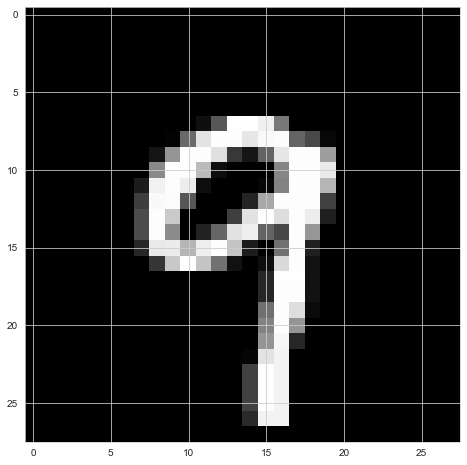

9


In [118]:
plt.figure(figsize=(8,8))
x = 170
grid_data = data.iloc[x].values.reshape(28,28)
plt.imshow(grid_data,interpolation="none", cmap="gray")
plt.show()
print(label[x])

### getting 15k data points to work on it becouse of time effeciency

In [119]:
labels = label.head(15000)
datas = data.head(15000)
print(labels.shape)
print(datas.shape)

(15000,)
(15000, 784)


## Step1
Data preprocessing: Standardizing the data

In [120]:
from sklearn.preprocessing import StandardScaler
stand_data = StandardScaler().fit_transform(datas)
print(stand_data.shape)

(15000, 784)


In [121]:
# findig the covariance matrix : A^T * A
sample_data = stand_data
covar_matrix =  np.matmul(sample_data.T, sample_data)
print(covar_matrix.shape)

(784, 784)


In [122]:
from scipy.linalg import eigh

values, vectors = eigh(covar_matrix, eigvals=(782,783))
print(values)
print(vectors.shape)
vectors =  vectors.T
print(vectors.shape)

[459916.45167454 616509.42694774]
(784, 2)
(2, 784)


In [123]:
new_coordinates = np.matmul(vectors, sample_data.T)
print(new_coordinates.shape)
print(labels.shape)


(2, 15000)
(15000,)


In [124]:
new_coordinates = np.vstack((new_coordinates,labels)).T
#print(new_coordinates.shape)
dataFrame = pd.DataFrame(data=new_coordinates, columns=("1st-principal", "2nd-principal", "labels"))
print(dataFrame.head())

   1st-principal  2nd-principal  labels
0      -4.457050       0.960769     5.0
1      -7.397795      -8.658155     0.0
2       9.640690      -2.082854     4.0
3      -3.356074       7.187465     1.0
4       2.979880       4.933889     9.0


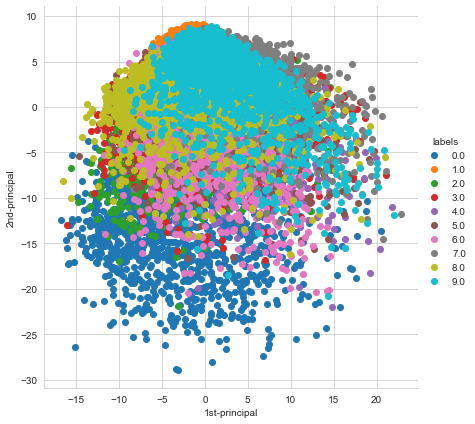

In [125]:
sns.set_style("whitegrid")
sns.FacetGrid(dataFrame, hue="labels", height=6).map(plt.scatter, "1st-principal", "2nd-principal").add_legend()
plt.show()

# PCA Using Scikit-Learn

In [126]:
from sklearn import decomposition
pca = decomposition.PCA()

In [127]:
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)
pca_data.shape

(15000, 2)

In [128]:
pca_data = np.vstack((pca_data.T, labels)).T

pca_pd = dataFrame = pd.DataFrame(data=pca_data, columns=("1st-principal", "2nd-principal", "labels"))
print(pca_pd.shape)

(15000, 3)


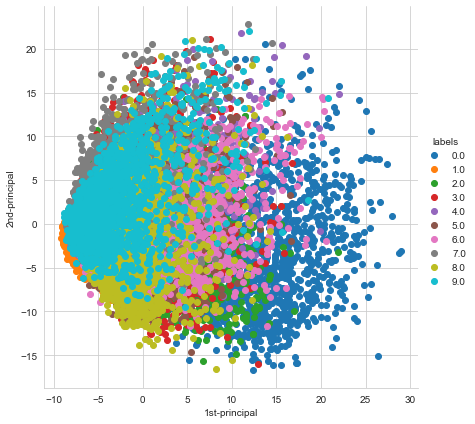

In [131]:
sns.FacetGrid(pca_pd, hue="labels", height=6).map(plt.scatter, "1st-principal", "2nd-principal").add_legend()
plt.show()